<a href="https://colab.research.google.com/github/Raphael-Blaize/K-NN-CLASSIFIER-AND-NAIVE-BAYES-/blob/main/K_NN_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN CLASSIFIER SOLUTIONS

## 1. Defining the Question

### a) Specifying the Question


> During this week’s Independent project, you will get to test the skills that you learned this week. More specifically, you will get the test your understanding of the following learning outcomes.

> Overall Learning Outcomes

>> I can understand and apply supervised learning algorithms such as regression, decision trees, KNN, SVM, naive Bayes, random forests to solving business problems.

>> I can understand the benefits, limitations, and requirements of various supervised learning algorithms.



### b) Defining the Metric for Success


> Able to use find the optimal k-nn parameters to increase the accuracy of my model

> No multicollinearity in the dataset in-order to acchive accurate results 

> Ensuring that the data has been preproccesed well this includes:

        1. Taking care of Outliers
        2. Taking care of missing values 
        3. Taking care of column names 
        4. Taking care of special character if there is any

> Ensuring that my dataset has also been encoded properly before applying it to the model for training 

### d) Recording the Experimental Design

> We will be conducting an EDA Analysis of the data in -order to understand the relationship in the variables by:

         1. Univariate analysis
         2. Bivarate analysis 
         3. Multi-variate analysis where needed

> We will also see the correlation between the variables using: 

         1. Heatmap to see the correlation
         2. Pearsons correlation 
         3. Chi squared where possible 

**Modelling approach**
         
        1. K-NN Classifier:
> Randomly partition each dataset into two parts i.e 80 - 20  sets.
For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

> Compute the accuracy (percentage of correct classification).

> Report the confusion matrix of the classifier in each different set.

> Suggest and apply at least one of the optimization techniques.

> Provide further recommendations to improve the classifier.

## **DATASETS USED IN THIS ANALYSIS**

The Datset files used in this analysis are found from the link below

Link1 : [Dataset](https://archive.org/download/train5_202002/train%20%285%29.csv)

Link2: [Dataset](https://archive.org/download/test1_202002/test%20%281%29.csv)








## **DATA SECTION**

### **IMPORTING THE LIBRARIES WE NEED AND LOOKING THROUGH OUR DATASET TO UNDERSTAND IT BETTER**

In [175]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
#Reading our dataset
df = pd.read_csv('train (5).csv')
## reading the first 10 rows of our dataset
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##### DATASET PREPROCESSING SECTION

In [211]:
# checking the info on our ranking dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [212]:
#cheking the shape of our data 
df.shape

(891, 12)

In [213]:
#cheking for null values 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [214]:
#cheking the percentage of null values in our columns
percent_miss = df.isnull().sum() * 100 / len(df)

#Putting the percentage into a dataframe
missing_dataframe = pd.DataFrame({'percent_missing': percent_miss})
missing_dataframe

,percent_missing
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


**Analysis of the missing values**
      
> From the above dataframe we can see that the Age only has 19% of missing values from the total which is not that bad so filling it with 0 will help me keep important features in the dataset

> We can also see that cabin has a very high percentage of missing values which is 77% of the total, i will not proceed to drop this column because of it's high missing values

> We also see emabarked has few missing values at around 0.22% so i will not drop the missing values but fill them with zero 

In [215]:
# 1. filling the rest of the missing values with 0
df.fillna(0, inplace = True)

# cheking if the missing values have been filled with zero 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [216]:
#cheking for duplicates in the dataset 
df.duplicated().sum()

0

There are a no duplicated values in the dataset

In [217]:
#cheking the unique values in the column names 

#for loop to iterate through each column
for column in df.columns:
  # creating a variable columnc which will be the the content in each column
  columnc = df[column]
  #Printing the column name
  print(column)
  #printing the unique values in the column
  print(columnc.unique())
  # printing the number of unique values in the column
  print(columnc.nunique())
  print("\n")

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [218]:
#cheking column types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

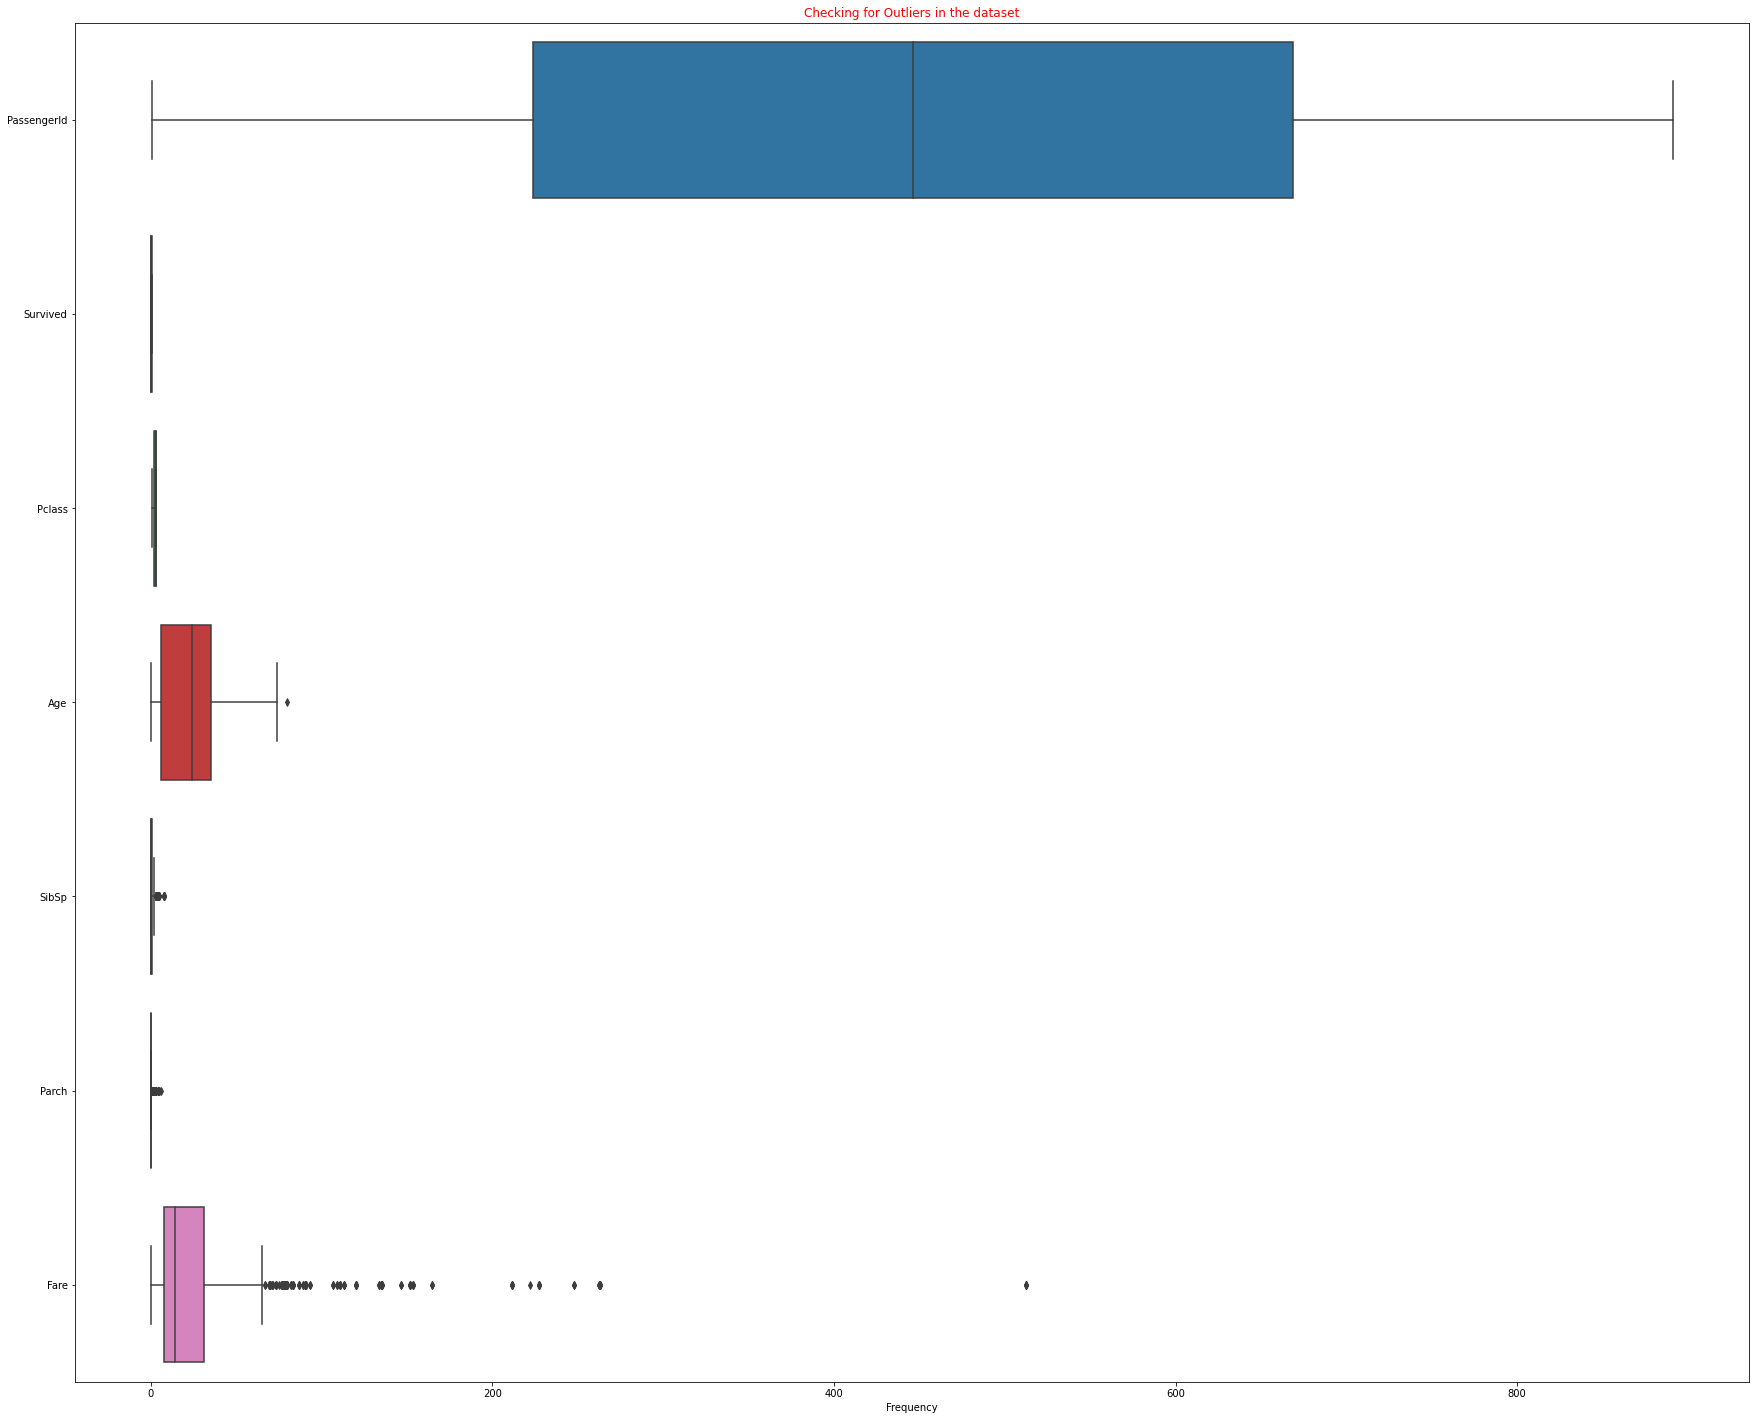

In [219]:
#cheking for outliers in the dataset 
plt.figure(edgecolor = 'purple')
ax = sns.boxplot(data = df , orient="h")
plt.title('Checking for Outliers in the dataset', color = 'Red')
plt.xlabel('Frequency')
plt.show()

> From the above outliers we can see that fare has the most number of outliers, i will not want to drop them because it may affect the overall quality of the model, also increasing the chances of not gaining insights from the our analysis 

### EDA ANALYSIS

#### **PERFORMING UNIVARIATE ANALYSIS** 

#### a) Categorical and Categorical

In [220]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

> Frequency table

In [221]:
#Let us exculde names in the frequency because each person has a unique name
df2 = df.drop(columns = ['Name'])

In [222]:
# getting the frequency of my categorical variables
cat = df2.select_dtypes(include = 'object').columns
print(cat)

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [223]:
# gettting the frequency of the categorical columns
for freq in cat:
  print(df[freq].value_counts())
  print('\n')

male      577
female    314
Name: Sex, dtype: int64


CA. 2343      7
347082        7
1601          7
3101295       6
347088        6
             ..
A.5. 11206    1
248747        1
348123        1
349245        1
218629        1
Name: Ticket, Length: 681, dtype: int64


0              687
C23 C25 C27      4
G6               4
B96 B98          4
E101             3
              ... 
A31              1
B82 B84          1
D7               1
D19              1
F G63            1
Name: Cabin, Length: 148, dtype: int64


S    644
C    168
Q     77
0      2
Name: Embarked, dtype: int64




Fromt the above we can see that there are more male passengers compared to female and there also more s embarked comapred to the rest

####  Numerical variables

######  a) Measures of central tendancy

In [224]:
#Mean
for column in df:
  # Selecting column contents by column name using [] operator
       columncontent = df[column]
       numerical = df.select_dtypes(exclude = 'object')
       if column in numerical:
         print('Colunm Name', column)
         print('Column mean:', columncontent.mean())
         print()

Colunm Name PassengerId
Column mean: 446.0

Colunm Name Survived
Column mean: 0.3838383838383838

Colunm Name Pclass
Column mean: 2.308641975308642

Colunm Name Age
Column mean: 23.79929292929293

Colunm Name SibSp
Column mean: 0.5230078563411896

Colunm Name Parch
Column mean: 0.38159371492704824

Colunm Name Fare
Column mean: 32.2042079685746



In [225]:
# median
for column in df:
  columncontent = df[column]
  if column in numerical:
    print("Column Name", column)
    print("Column Median", columncontent.median())
    print()

Column Name PassengerId
Column Median 446.0

Column Name Survived
Column Median 0.0

Column Name Pclass
Column Median 3.0

Column Name Age
Column Median 24.0

Column Name SibSp
Column Median 0.0

Column Name Parch
Column Median 0.0

Column Name Fare
Column Median 14.4542



In [226]:
# variance
for column in df:
  columncontent = df[column]
  if column in numerical:
    print("Column Name", column)
    print("Column Variance:", columncontent.var())
    print()

Column Name PassengerId
Column Variance: 66231.0

Column Name Survived
Column Variance: 0.2367722165474984

Column Name Pclass
Column Variance: 0.6990151199889065

Column Name Age
Column Variance: 309.62182253319764

Column Name SibSp
Column Variance: 1.2160430774662894

Column Name Parch
Column Variance: 0.6497282437357467

Column Name Fare
Column Variance: 2469.436845743117



In [227]:
#cheking for skewnwess in my columns
# also cheking if the columns is postiviley or negative;y skewed
# defining a custom function called my_skew to check the skewness of each column

def my_skew():
  #iterating through each column name 
  for column in df:
    columncontent = df[column]#setting the column content to be the column name after each iteration
    if column in numerical:
      skew = columncontent.skew() #Getting the skewness of column content
      if skew > 0 :
        print("Positively skewed") 
      elif skew == 0 :
        print("Symmetric distribution")
      else:
        print("negatively skewed")

      print("Column Name", column, "....")
      print("Column skewness:", skew)
      print("\n")

#calling the function
print(my_skew())

Symmetric distribution
Column Name PassengerId ....
Column skewness: 0.0


Positively skewed
Column Name Survived ....
Column skewness: 0.4785234382949897


negatively skewed
Column Name Pclass ....
Column skewness: -0.6305479068752845


Positively skewed
Column Name Age ....
Column skewness: 0.2628619929342128


Positively skewed
Column Name SibSp ....
Column skewness: 3.6953517271630565


Positively skewed
Column Name Parch ....
Column skewness: 2.7491170471010933


Positively skewed
Column Name Fare ....
Column skewness: 4.787316519674893


None


In [228]:
#Getting the Kurtosis of the columns
def kurt():
  for column in df:
    columncontent = df[column]
    if column in numerical:
      kurt = columncontent.kurt()
      if kurt > 3:
        print('It is leptokurtic distribution')
      elif kurt < 3:
        print('It is platykurtic distribution')
      else:
        print('It is mesokurtic distribution') 
      print("Column Name :", column)
      print("Kutorsis Value:", kurt)
      print("\n")
 
print(kurt())

It is platykurtic distribution
Column Name : PassengerId
Kutorsis Value: -1.1999999999999997


It is platykurtic distribution
Column Name : Survived
Kutorsis Value: -1.775004671066304


It is platykurtic distribution
Column Name : Pclass
Kutorsis Value: -1.2800149715782825


It is platykurtic distribution
Column Name : Age
Kutorsis Value: -0.5375329510273579


It is leptokurtic distribution
Column Name : SibSp
Kutorsis Value: 17.880419726645968


It is leptokurtic distribution
Column Name : Parch
Kutorsis Value: 9.778125179021648


It is leptokurtic distribution
Column Name : Fare
Kutorsis Value: 33.39814088089868


None


In [229]:
#describing my dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Distributions 

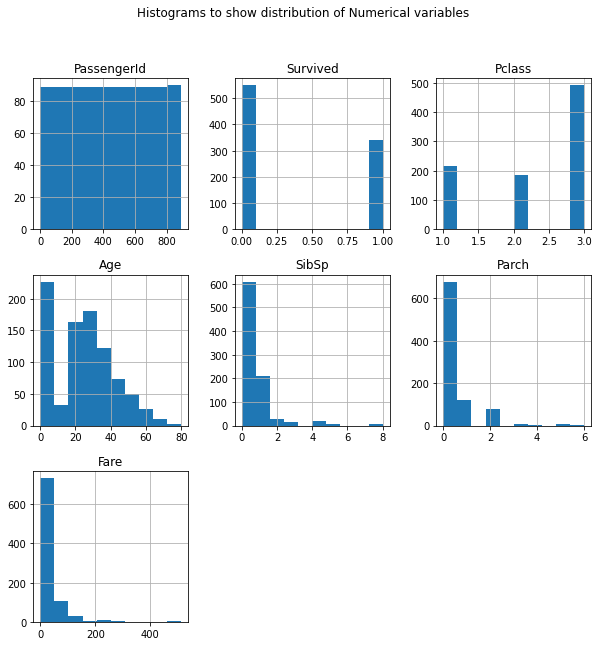

In [230]:
df.hist(bins=10, figsize=(10,10))
plt.suptitle('Histograms to show distribution of Numerical variables')
plt.show()

#### **PERFORMING BIVARIATE ANALYSIS** 

##### **BAR CHARTS** 

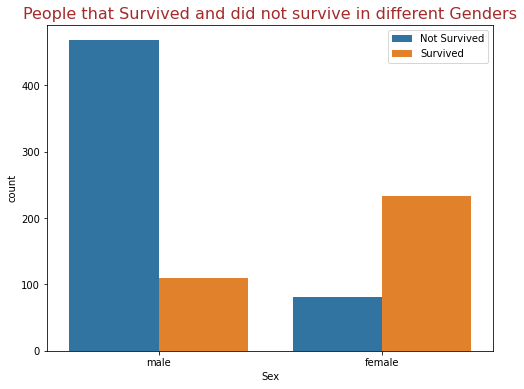

In [231]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data=df, hue='Survived')
plt.legend(['Not Survived', 'Survived'])
plt.title('People that Survived and did not survive in different Genders', fontsize=16, color='brown')
plt.show();

From the bar chart above we can see that there were more female survivers compared to males, but due to there being more males than females in this dataset it introduces the biasness

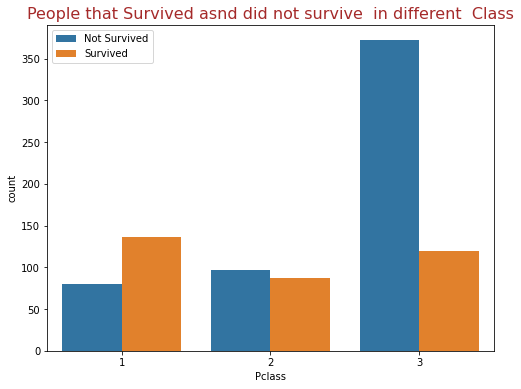

In [232]:
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', data=df, hue='Survived')
plt.legend(['Not Survived', 'Survived'])
plt.title('People that Survived asnd did not survive  in different  Class', fontsize=16, color='brown')
plt.show();

Here we can see that there were more people from the third class that did not survive compared t to other classes and the most people who survived are from the first class 

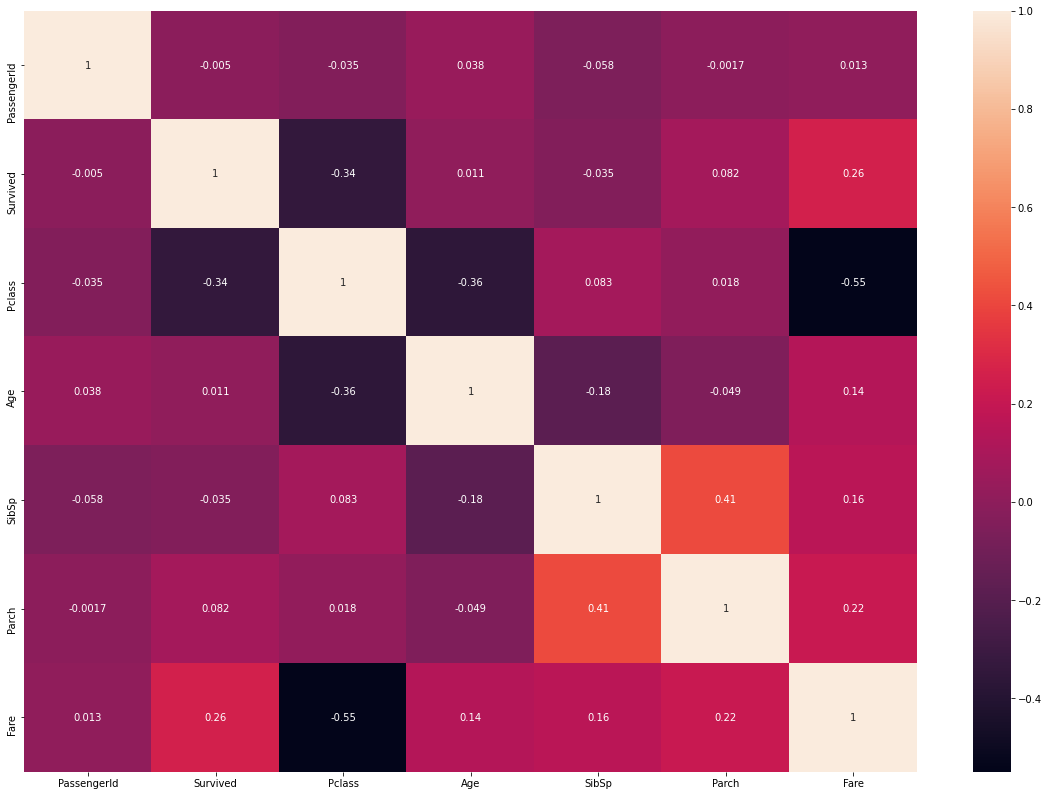

In [233]:
# showing correlation on a heatmap
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), annot = True)
plt.show()

From the above correlation heatmap we can see that SibSp and Parch have a moderate postive correlation it is not as strong but it is also not a weak correaltion 

####  **PERFORMING MULTIVARIATE ANALYSIS**

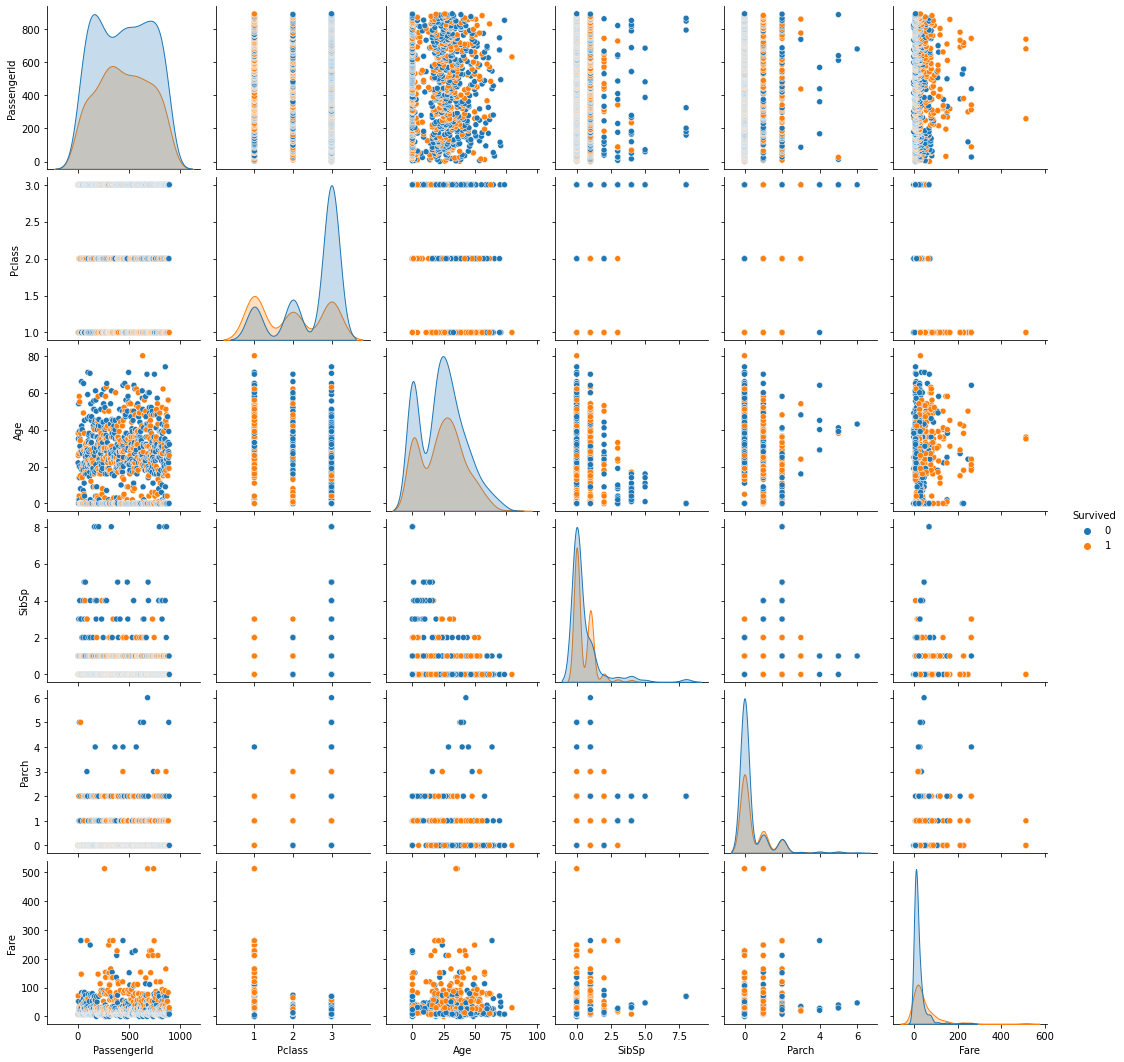

In [234]:
#Plotting a pair plot in accordace to Survived
sns.pairplot(df, hue = 'Survived')
plt.show()

## IMPLEMENTING THE SOLUTION

#### K-NN CLASSIFIER

In [330]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [331]:
#Dropping irrelevant columns
df1 = df.drop(columns = ['Name', 'Ticket', 'Cabin'])

In [332]:
# choosing my matrix of features x and the dv
x = df1.drop(['Survived'], axis =1)
y = df1['Survived']

In [333]:
#encoding my categorical varibales in x  with get dummies method

# Get dummies
x = pd.get_dummies(x, prefix_sep='_', drop_first=True)
# X head
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,0,1


##### 80 : 20 split K-NN:

In [334]:
# making the training set and the test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [335]:
#applying feature scaling to my varaibles
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [336]:
#Training the KNN on the training set
from sklearn.neighbors import KNeighborsClassifier
# the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier = KNeighborsClassifier (n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [337]:
#Predicting the test set results
y_pred = classifier.predict(x_test)

In [338]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred) # the confusion matrix is evaluated in the test set 
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[96 14]
 [16 53]]
0.8324022346368715
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       110
           1       0.79      0.77      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



From the 80-20 split we can see that the accuracy is 83% , i will try with other various splits and see how this affects the accuracy 

##### 70-30 split K-NN

In [356]:
# making the training set and the test set
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [357]:
#applying feature scaling to my varaibles
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

In [358]:
#Training the KNN on the training set
from sklearn.neighbors import KNeighborsClassifier
# the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier = KNeighborsClassifier (n_neighbors = 5)
classifier.fit(x_train1, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [361]:
#Predicting the test set results
y_pred1 = classifier.predict(x_test1)

In [362]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test1, y_pred1) # the confusion matrix is evaluated in the test set 
print(cm)
print(accuracy_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

[[141  27]
 [ 25  75]]
0.8059701492537313
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       168
           1       0.74      0.75      0.74       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



With a 70-30 split the accuracy has greatly reduced even the f1 score at this point we can say that our model does better with a 80-20 split let us try one more plsit and see the accuracy 

##### 60-40 split K-NN

In [363]:
# making the training set and the test set
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.40, random_state = 0)

In [364]:
#applying feature scaling to my varaibles
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

In [365]:
#Training the KNN on the training set
from sklearn.neighbors import KNeighborsClassifier
# the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier = KNeighborsClassifier (n_neighbors = 5)
classifier.fit(x_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [367]:
#Predicting the test set results
y_pred2 = classifier.predict(x_test2)

In [368]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test2, y_pred2) # the confusion matrix is evaluated in the test set 
print(cm)
print(accuracy_score(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[191  30]
 [ 41  95]]
0.8011204481792717
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       221
           1       0.76      0.70      0.73       136

    accuracy                           0.80       357
   macro avg       0.79      0.78      0.79       357
weighted avg       0.80      0.80      0.80       357



the 60-40 split has the lowest accuracy so the best split is 80-30 and i will use that as my final split 

##### HYPERPARAMETER TUNING 

###### **80-20 split**

In [375]:
# making the training set and the test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#applying feature scaling to my varaibles
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Training the KNN on the training set
from sklearn.neighbors import KNeighborsClassifier
# the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier = KNeighborsClassifier (n_neighbors = 5)
classifier.fit(x_train, y_train)

#Predicting the test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred) # the confusion matrix is evaluated in the test set 
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# Getting the variance in the accuracies so we will print the sd
print("Standard Deviation of the cross validation: {:.2f} %".format(accuracies.std()*100))
print("\n")

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
 
parameters = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']},
              {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']}]

#finding the accuracy on the 10 test folds
#the n_jobs is to set all your process to run the grid search
# n_jobs=-1 causes the model to use as many available CPU resources as possible. It is better to keep this variable to -10 or even lesser in case you are sharing a server.
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy',
                           cv = 10, n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS")
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

[[96 14]
 [16 53]]
0.8324022346368715
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       110
           1       0.79      0.77      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy: 78.10 %
Standard Deviation of the cross validation: 3.66 %


ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS
Best Accuracy: 80.34 %
Best Parameters: {'algorithm': 'brute', 'metric': 'chebyshev', 'n_neighbors': 7, 'weights': 'uniform'}


###### **70-30 split**

In [377]:
# making the training set and the test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#applying feature scaling to my varaibles
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Training the KNN on the training set
from sklearn.neighbors import KNeighborsClassifier
# the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier = KNeighborsClassifier (n_neighbors = 5)
classifier.fit(x_train, y_train)

#Predicting the test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred) # the confusion matrix is evaluated in the test set 
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# Getting the variance in the accuracies so we will print the sd
print("Standard Deviation of the cross validation: {:.2f} %".format(accuracies.std()*100))
print("\n")

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
 
parameters = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']},
              {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']}]

#finding the accuracy on the 10 test folds
#the n_jobs is to set all your process to run the grid search
# n_jobs=-1 causes the model to use as many available CPU resources as possible. It is better to keep this variable to -10 or even lesser in case you are sharing a server.
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy',
                           cv = 10, n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS")
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

[[141  27]
 [ 25  75]]
0.8059701492537313
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       168
           1       0.74      0.75      0.74       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268

Accuracy: 78.65 %
Standard Deviation of the cross validation: 3.80 %


ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS
Best Accuracy: 81.22 %
Best Parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}


###### **60-40 split**

In [378]:
# making the training set and the test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

#applying feature scaling to my varaibles
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Training the KNN on the training set
from sklearn.neighbors import KNeighborsClassifier
# the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
classifier = KNeighborsClassifier (n_neighbors = 5)
classifier.fit(x_train, y_train)

#Predicting the test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred) # the confusion matrix is evaluated in the test set 
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# Getting the variance in the accuracies so we will print the sd
print("Standard Deviation of the cross validation: {:.2f} %".format(accuracies.std()*100))
print("\n")

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
 
parameters = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']},
              {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']}]

#finding the accuracy on the 10 test folds
#the n_jobs is to set all your process to run the grid search
# n_jobs=-1 causes the model to use as many available CPU resources as possible. It is better to keep this variable to -10 or even lesser in case you are sharing a server.
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy',
                           cv = 10, n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS")
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

[[191  30]
 [ 41  95]]
0.8011204481792717
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       221
           1       0.76      0.70      0.73       136

    accuracy                           0.80       357
   macro avg       0.79      0.78      0.79       357
weighted avg       0.80      0.80      0.80       357

Accuracy: 79.80 %
Standard Deviation of the cross validation: 4.76 %


ACCURACY AFTER 10 TEST FOLDS AND THE BEST PARAMETERS
Best Accuracy: 81.65 %
Best Parameters: {'algorithm': 'brute', 'metric': 'chebyshev', 'n_neighbors': 10, 'weights': 'uniform'}


##### **CONCLUSIONS**
       
**80-20 split**

    1. accuracy before cross-validation and hyperparamter tuning = 83%
    2. accuracy after cross-validation and hyperparamter tuning = 80.34%

**70-30 split**
      
      1. accuracy before cross-validation and hyperparamter tuning = 81%
      2. accuracy after cross-validation and hyperparamter tuning = 81.22 %%

**60-40 split**
      
      1. accuracy before cross-validation and hyperparamter tuning = 80%
      2. accuracy after cross-validation and hyperparamter tuning = 81.65%


The 60-40 split provides the best accuracy after hyperparamter tuning and cross validation in this case 